In [1]:
import pandas as pd
import numpy as np
import pymongo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [2]:
client = pymongo.MongoClient("Your unique client Id")
db = client.sample_airbnb
col = db.listingsAndReviews

In [3]:
rel_data = []
for i in col.find():
    data = dict(Id = i['_id'],
                Listing_url = i['listing_url'],
                Name = i.get('name'),
                Description = i['description'],
                House_rules = i.get('house_rules'),
                Property_type = i['property_type'],
                Room_type = i['room_type'],
                Bed_type = i['bed_type'],
                Min_nights = int(i['minimum_nights']),
                Max_nights = int(i['maximum_nights']),
                Cancellation_policy = i['cancellation_policy'],
                Accomodates = i['accommodates'],
                Total_bedrooms = i.get('bedrooms'),
                Total_beds = i.get('beds'),
                Availability_365 = i['availability']['availability_365'],
                Price = i['price'],
                Security_deposit = i.get('security_deposit'),
                Cleaning_fee = i.get('cleaning_fee'),
                Extra_people = i['extra_people'],
                Guests_included= i['guests_included'],
                No_of_reviews = i['number_of_reviews'],
                Review_scores = i['review_scores'].get('review_scores_rating'),
                Amenities = ', '.join(i['amenities']),
                Host_id = i['host']['host_id'],
                Host_name = i['host']['host_name'],
                Street = i['address']['street'],
                Country = i['address']['country'],
                Country_code = i['address']['country_code'],
                Location_type = i['address']['location']['type'],
                Longitude = i['address']['location']['coordinates'][0],
                Latitude = i['address']['location']['coordinates'][1],
                Is_location_exact = i['address']['location']['is_location_exact']
    )
    rel_data.append(data)

In [4]:
df = pd.DataFrame(rel_data)
df

,Id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact
0,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,3,365,...,"TV, Cable TV, Wifi, Air conditioning, Pool, Ki...",5448114,David,"Honolulu, HI, United States",United States,US,Point,-157.839190,21.286340,True
1,10059244,https://www.airbnb.com/rooms/10059244,Ligne verte - à 15 min de métro du centre ville.,À 30 secondes du métro Joliette. Belle grande ...,Non fumeur Respect des voisins Respect des bie...,Apartment,Entire home/apt,Real Bed,2,1125,...,"TV, Internet, Wifi, Kitchen, Free parking on p...",7140229,Caro,"Montréal, Québec, Canada",Canada,CA,Point,-73.549490,45.545480,False
2,10140368,https://www.airbnb.com/rooms/10140368,A bedroom far away from home,"NOTES: BEFORE BOOKING, PLEASE KNOW THAT WE ARE...",No shoes allowed inside the apartment. Be poli...,Apartment,Private room,Real Bed,1,10,...,"Wifi, Kitchen, Free street parking, Heating, F...",1017772,Lane,"Queens, NY, United States",United States,US,Point,-73.822570,40.714850,True
3,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Make the house your home...,House,Entire home/apt,Real Bed,2,30,...,"TV, Cable TV, Wifi, Kitchen, Paid parking off ...",51399391,Ana&Gonçalo,"Porto, Porto, Portugal",Portugal,PT,Point,-8.613080,41.141300,False
4,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,Apartment,Entire home/apt,Real Bed,4,20,...,"Air conditioning, Kitchen, Smoking allowed, Do...",51624384,Giovanni,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.150270,22.281580,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9917859,https://www.airbnb.com/rooms/9917859,StayIN Oporto Música - Apartment,Acabamos de decorar-lo para receber os primeir...,,Apartment,Entire home/apt,Real Bed,1,1125,...,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,"Porto, Porto, Portugal",Portugal,PT,Point,-8.606220,41.151270,True
5551,9936016,https://www.airbnb.com/rooms/9936016,Alugo Apartamento na Tijuca,Apartamento amplo que acomoda 6 pessoas. Um qu...,Cuidar das instalações e objetos da casa em pe...,Apartment,Entire home/apt,Real Bed,1,1125,...,"TV, Cable TV, Internet, Wifi, Air conditioning...",47092481,Aliane,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.173761,-22.908336,False
5552,9979991,https://www.airbnb.com/rooms/9979991,,"Located at the heart of Kowloon, our unit is s...",,Apartment,Entire home/apt,Real Bed,1,1125,...,"TV, Internet, Air conditioning, Kitchen, Eleva...",51283546,Alexis,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.169630,22.315690,False
5553,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"As a guest of Coconut Condos, I agree to the f...",Townhouse,Entire home/apt,Real Bed,3,365,...,"TV, Wifi, Air conditioning, Pool, Kitchen, Fre...",51013381,Coconut Condos,"Lahaina, HI, United States",United States,US,Point,-156.667520,20.858940,False


# Data type Correction

In [114]:
# checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Listing_url          5555 non-null   object 
 2   Name                 5555 non-null   object 
 3   Description          5555 non-null   object 
 4   House_rules          5555 non-null   object 
 5   Property_type        5555 non-null   object 
 6   Room_type            5555 non-null   object 
 7   Bed_type             5555 non-null   object 
 8   Min_nights           5555 non-null   int64  
 9   Max_nights           5555 non-null   int64  
 10  Cancellation_policy  5555 non-null   object 
 11  Accomodates          5555 non-null   int64  
 12  Total_bedrooms       5550 non-null   float64
 13  Total_beds           5542 non-null   float64
 14  Availability_365     5555 non-null   int64  
 15  Price                5555 non-null   o

In [5]:
# The below features are in Decimal128 type hence changing it to relevant data types
df.Price = df.Price.astype(str).astype(float)
df.Security_deposit = df.Security_deposit[~df.Security_deposit.isna()].astype(str).astype(float)
df.Cleaning_fee = df.Cleaning_fee[~df.Cleaning_fee.isna()].astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)
df.Review_scores = df.Review_scores.astype('Int64')

# Filling Missing values

In [116]:
df.isna().sum()

Id                        0
Listing_url               0
Name                      0
Description               0
House_rules               0
Property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
No_of_reviews             0
Review_scores          1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Country_code              0
Location_type             0
Longitude                 0
Latitude                  0
Is_location_exact         0
dtype: int64

In [6]:
# Filling Total bedrooms with mode
df.Total_bedrooms.fillna(df.Total_bedrooms.mode()[0],inplace=True)
# Filling Total beds with median because data has outliers
df.Total_beds.fillna(df.Total_beds.median(),inplace=True)
df.Security_deposit.fillna(df.Security_deposit.median(),inplace=True)
df.Cleaning_fee.fillna(df.Cleaning_fee.median(),inplace=True)
df.Review_scores.fillna(df.Review_scores.median(),inplace=True)

In [7]:
# Filling Empty values in Description and House rules columns
df.Description.replace(to_replace='',value='No Description Provided',inplace=True)
df.House_rules.replace(to_replace='',value='No House rules Provided',inplace=True)
df.Amenities.replace(to_replace='',value='Not Available',inplace=True)

In [118]:
df.isna().sum()

Id                     0
Listing_url            0
Name                   0
Description            0
House_rules            0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accomodates            0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Extra_people           0
Guests_included        0
No_of_reviews          0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Street                 0
Country                0
Country_code           0
Location_type          0
Longitude              0
Latitude               0
Is_location_exact      0
dtype: int64

In [204]:
# Checking Duplicate records
df[df.duplicated()]

,Id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact


In [8]:
# Name Column has empty values and some duplicates hence dropping them
df.drop(labels=list(df[df.Name.duplicated(keep=False)].index),inplace=True)

In [9]:
df.reset_index(drop=True,inplace=True)

In [192]:
# Converting dataframe to csv file and saving it
df.to_csv('Airbnb_data.csv',index=False)

# Exploratory Data Analysis

Text(0.5, 1.0, 'Top 10 Property Types available')

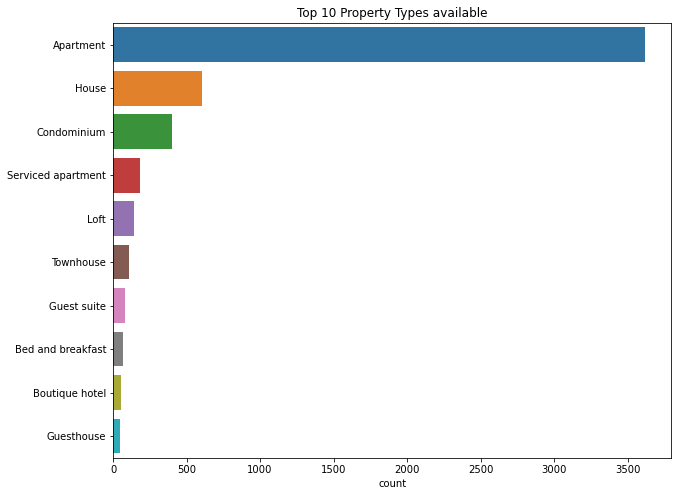

In [223]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,y=df.Property_type.values,order=df.Property_type.value_counts().index[:10])
ax.set_title("Top 10 Property Types available")

Text(0.5, 1.0, 'Total Listings in each Room Type')

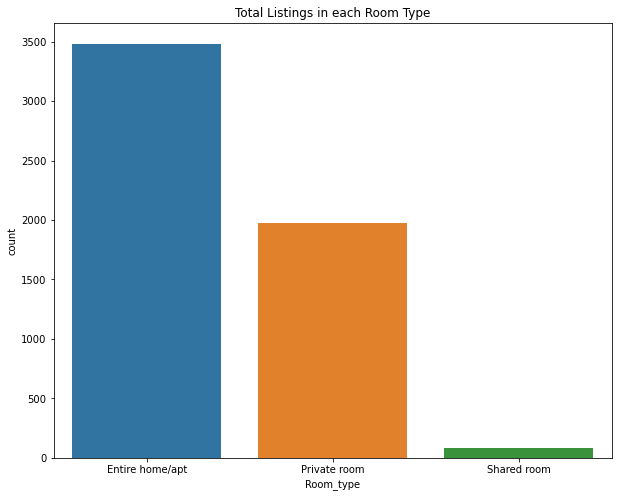

In [224]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x=df.Room_type)
ax.set_title("Total Listings in each Room Type")

In [219]:
# top 10 Hosts with Highest number of listings
df.Host_name.value_counts()

Maria       37
David       26
Ana         21
Sarah       20
Jov         18
            ..
Xiaomin      1
Javed        1
Sandrine     1
Amel         1
Aliane       1
Name: Host_name, Length: 3137, dtype: int64

Text(0.5, 1.0, 'Top 10 Hosts with Highest number of Listings')

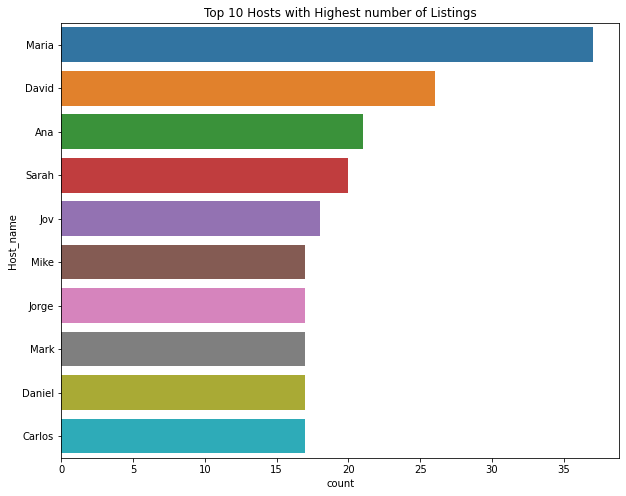

In [226]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,y=df.Host_name,order=df.Host_name.value_counts().index[:10])
ax.set_title("Top 10 Hosts with Highest number of Listings")

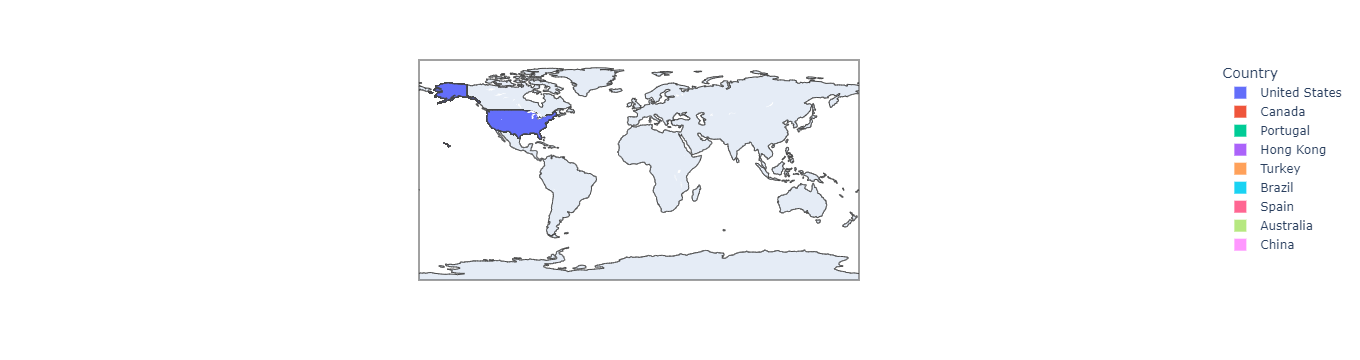

In [94]:
fig = px.choropleth(data_frame=df,
                    locations='Country_code',
                    color='Country',
                    locationmode='country names')
fig.show()

In [49]:
country_df = df.groupby('Country',as_index=False)['Price'].mean()

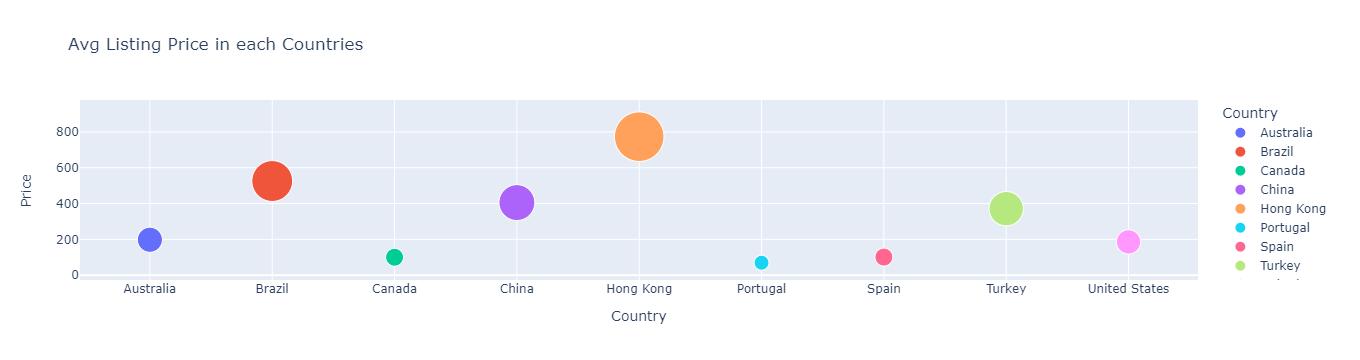

In [93]:
fig = px.scatter(data_frame=country_df,
           x='Country',y='Price',
           color='Country',
           size='Price',
           opacity=1,
           size_max=35,
           title='Avg Listing Price in each Countries')
fig.show()

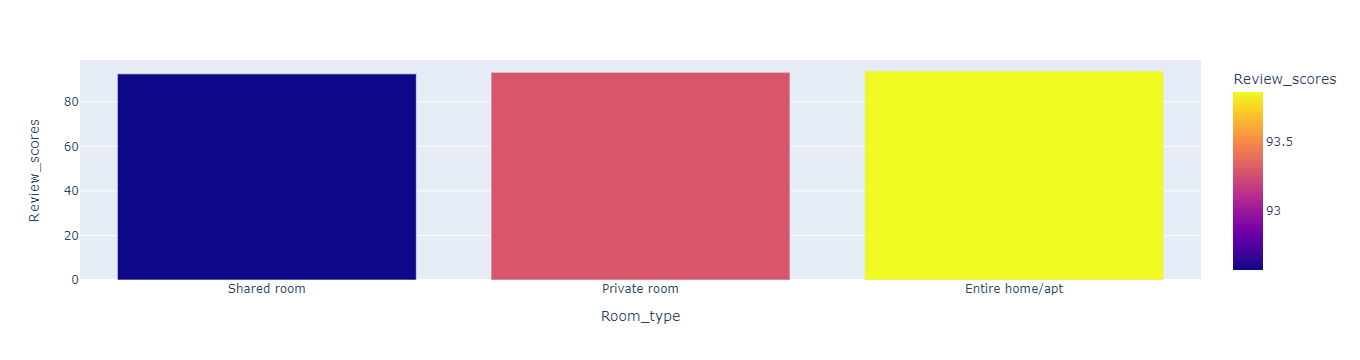

In [120]:
rev_df = df.groupby('Room_type',as_index=False)['Review_scores'].mean().sort_values(by='Review_scores')
fig = px.bar(data_frame=rev_df,x='Room_type',y='Review_scores',color='Review_scores')
fig.show()

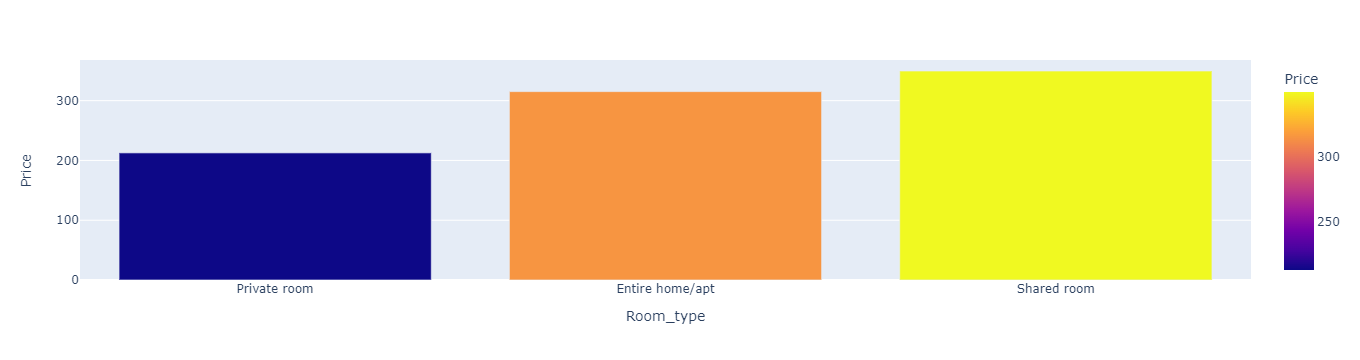

In [119]:
pr_df = df.groupby('Room_type',as_index=False)['Price'].mean().sort_values(by='Price')
fig = px.bar(data_frame=pr_df,x='Room_type',y='Price',color='Price')
fig.show()